In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gensim
import csv
from scipy.stats import spearmanr
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from tqdm import tqdm

60. 単語ベクトルの読み込みと表示  
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [4]:
wvs = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
wvs['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

61. 単語の類似度  
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [5]:
wvs.similarity('United_States','U.S.')

0.73107743

62. 類似度の高い単語10件  
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [7]:
wvs.most_similar("United_States")

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.7400725483894348),
 ('U.S.', 0.7310773730278015),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

63. 加法構成性によるアナロジー  
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [8]:
vec = wvs['Spain'] - wvs['Madrid'] + wvs['Athens']
wvs.similar_by_vector(vec)

[('Athens', 0.7528455853462219),
 ('Greece', 0.6685471534729004),
 ('Aristeidis_Grigoriadis', 0.5495778322219849),
 ('Ioannis_Drymonakos', 0.5361457467079163),
 ('Greeks', 0.5351786017417908),
 ('Ioannis_Christou', 0.5330225825309753),
 ('Hrysopiyi_Devetzi', 0.5088489055633545),
 ('Iraklion', 0.5059264302253723),
 ('Greek', 0.5040615797042847),
 ('Athens_Greece', 0.5034108757972717)]

64. アナロジーデータでの実験  
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [17]:
with open('questions-words.txt') as rf:
    ls = rf.readlines()

In [19]:
sem = []
syn = []
flag = False
for l in tqdm(ls):
    words = l.strip().split(' ')
    if len(words) > 2:
        vec = wvs[words[1]] - wvs[words[0]] + wvs[words[2]]
        sim = wvs.similar_by_vector(vec,topn=1)
        if flag: syn.append([words, sim[0][0], sim[0][1]])
        else: sem.append([words, sim[0][0], sim[0][1]])
    elif 'gram1-adjective-to-adverb' in l: flag = True

100%|██████████| 19558/19558 [1:51:07<00:00,  2.93it/s]  


In [21]:
sem

[[['Athens', 'Greece', 'Baghdad', 'Iraq'], 'Baghdad', 0.7489827275276184],
 [['Athens', 'Greece', 'Bangkok', 'Thailand'], 'Bangkok', 0.7431141138076782],
 [['Athens', 'Greece', 'Beijing', 'China'], 'China', 0.7186592221260071],
 [['Athens', 'Greece', 'Berlin', 'Germany'], 'Germany', 0.6720893383026123],
 [['Athens', 'Greece', 'Bern', 'Switzerland'], 'Bern', 0.6902341842651367],
 [['Athens', 'Greece', 'Cairo', 'Egypt'], 'Egypt', 0.7626821398735046],
 [['Athens', 'Greece', 'Canberra', 'Australia'],
  'Canberra',
  0.7407206892967224],
 [['Athens', 'Greece', 'Hanoi', 'Vietnam'], 'Hanoi', 0.750990092754364],
 [['Athens', 'Greece', 'Havana', 'Cuba'], 'Havana', 0.7262827754020691],
 [['Athens', 'Greece', 'Helsinki', 'Finland'], 'Helsinki', 0.7235296368598938],
 [['Athens', 'Greece', 'Islamabad', 'Pakistan'],
  'Islamabad',
  0.7821411490440369],
 [['Athens', 'Greece', 'Kabul', 'Afghanistan'], 'Kabul', 0.7715259790420532],
 [['Athens', 'Greece', 'London', 'England'], 'London', 0.5891345739364

In [22]:
syn

[[['amazing', 'amazingly', 'apparent', 'apparently'],
  'apparent',
  0.6294243335723877],
 [['amazing', 'amazingly', 'calm', 'calmly'], 'calm', 0.806537926197052],
 [['amazing', 'amazingly', 'cheerful', 'cheerfully'],
  'cheerful',
  0.7660616040229797],
 [['amazing', 'amazingly', 'complete', 'completely'],
  'complete',
  0.5995011925697327],
 [['amazing', 'amazingly', 'efficient', 'efficiently'],
  'efficient',
  0.7561460733413696],
 [['amazing', 'amazingly', 'fortunate', 'fortunately'],
  'fortunate',
  0.6995916366577148],
 [['amazing', 'amazingly', 'free', 'freely'], 'free', 0.6646871566772461],
 [['amazing', 'amazingly', 'furious', 'furiously'],
  'furious',
  0.6918247938156128],
 [['amazing', 'amazingly', 'happy', 'happily'], 'happy', 0.6127370595932007],
 [['amazing', 'amazingly', 'immediate', 'immediately'],
  'immediate',
  0.654332160949707],
 [['amazing', 'amazingly', 'infrequent', 'infrequently'],
  'infrequent',
  0.7810533046722412],
 [['amazing', 'amazingly', 'lucky'

65. アナロジータスクでの正解率  
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [20]:
sem_ans = np.array([l[0][3]==l[1] for l in sem])
syn_ans = np.array([l[0][3]==l[1] for l in syn])
print("semantic:", np.sum(sem_ans)/len(sem_ans))
print("syntactic:", np.sum(syn_ans)/len(syn_ans))

semantic: 0.17352576389671892
syntactic: 0.2253864168618267


66. WordSimilarity-353での評価  
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [23]:
human = []
machine = []
with open('wordsim353/combined.csv') as f:
    rows = csv.reader(f,delimiter=",",lineterminator="\r\n")
    header = next(rows)
    for row in rows:
        human.append(float(row[2]))
        machine.append(wvs.similarity(row[0],row[1]))

correlation, pvalue = spearmanr(human, machine)
print(correlation)

0.7000166486272194


67. k-meansクラスタリング  
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [24]:
cot = []
with open('questions-words.txt',mode='r') as f:
    while True:
        l = f.readline()
        words = l.split(' ')
        if len(words) > 2:
            cot += [words[1],words[3].strip('\n')]
        elif l.startswith(': currency') or not l:
            break

cot = list(set(cot))
vec = [wvs[word] for word in cot]
cls = KMeans(n_clusters=5)
result = cls.fit(vec)
labels = cls.labels_
cluster_to_words = {0:[], 1:[], 2:[], 3:[], 4:[]}
for cluster_id, word in zip(labels, cot):
    cluster_to_words[cluster_id].append(word)

print(cluster_to_words)

{0: ['Syria', 'Libya', 'Iran', 'Algeria', 'Oman', 'Afghanistan', 'Pakistan', 'Mauritania', 'Iraq', 'Jordan', 'Tunisia', 'Morocco', 'Qatar', 'Bahrain', 'Lebanon', 'Egypt'], 1: ['Hungary', 'Moldova', 'Armenia', 'Latvia', 'Poland', 'Bulgaria', 'Macedonia', 'Greece', 'Russia', 'Azerbaijan', 'Montenegro', 'Tajikistan', 'Turkey', 'Slovenia', 'Kazakhstan', 'Uzbekistan', 'Ukraine', 'Slovakia', 'Romania', 'Malta', 'Estonia', 'Belarus', 'Kyrgyzstan', 'Serbia', 'Albania', 'Cyprus', 'Georgia', 'Turkmenistan', 'Croatia', 'Lithuania'], 2: ['Gambia', 'Mali', 'Sudan', 'Ghana', 'Nigeria', 'Eritrea', 'Angola', 'Rwanda', 'Zambia', 'Malawi', 'Guinea', 'Gabon', 'Mozambique', 'Zimbabwe', 'Botswana', 'Kenya', 'Senegal', 'Burundi', 'Liberia', 'Somalia', 'Niger', 'Namibia', 'Uganda', 'Madagascar'], 3: ['Denmark', 'Portugal', 'Finland', 'Japan', 'England', 'China', 'Norway', 'Ireland', 'Switzerland', 'Chile', 'Germany', 'Spain', 'Uruguay', 'Liechtenstein', 'Italy', 'Canada', 'Australia', 'Sweden', 'Belgium', 'A

68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

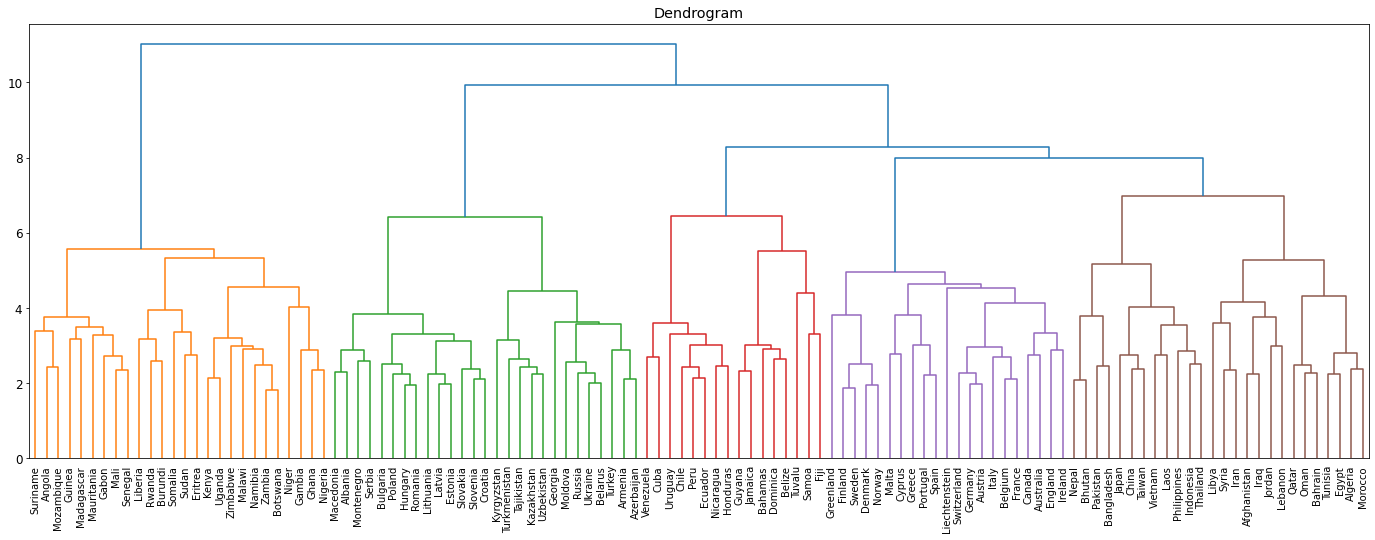

In [35]:
Z = linkage(vec,method='ward')
fig = plt.figure(figsize=(24,8))
dendrogram(Z, labels=cot, leaf_font_size=10)
plt.title("Dendrogram")
plt.show()

69. t-SNEによる可視化  
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

/Users/harukapc/anaconda3/envs/knock/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/harukapc/anaconda3/envs/knock/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


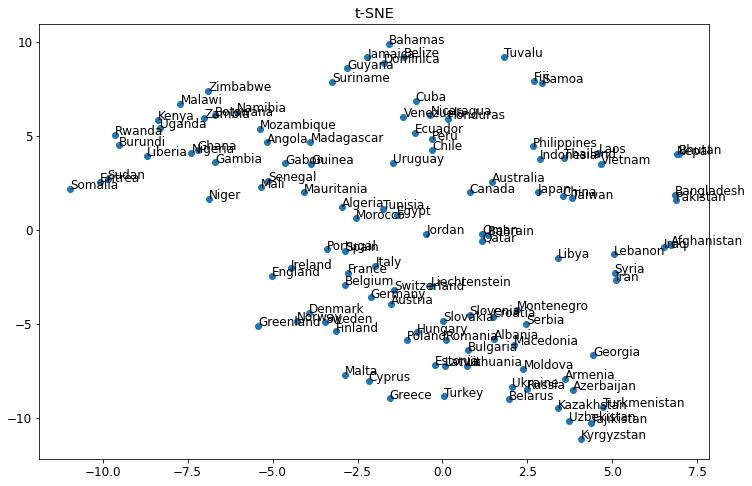

In [33]:
tsne = TSNE()
tsne.fit(vec)
fig = plt.figure(figsize=(12,8))
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])
plt.title("t-SNE")
for (x, y), name in zip(tsne.embedding_, cot):
    plt.annotate(name, (x, y))
plt.show()